# WINE QUALITY - K-Nearest Neighbors (KNN)

#  Purpose

The purpose of this notebook is to implement and evaluate a **K-Nearest Neighbors (KNN)** classification model on a **pre-standardized wine dataset**.  
This notebook focuses on demonstrating the entire machine learning workflow — from loading and cleaning data to training, evaluating, and visualizing the KNN model’s performance.

**Main goals:**
- Load and explore the preprocessed `Wine_clean.csv` dataset.  
- Understand the dataset structure through `info()`, `describe()`, and visualization.  
- Address class imbalance using a combination of **SMOTE** (oversampling) and **RandomUnderSampler** (undersampling).  
- Train and test a **KNN classifier** with `k=5` neighbors.  
- Evaluate the model using **accuracy**, **classification report**, **confusion matrix**, and **ROC-AUC score**.  
- Visualize the class distribution, correlation heatmap, and confusion matrix.

---

#  Contents

1. **Import Required Libraries**  
   
2. **Load and Inspect Dataset**  
   
3. **Exploratory Data Analysis (EDA)**  
   
4. **Data Preparation**  
   
5. **Model Training: KNN Classifier**  
  
6. **Model Evaluation**  
   
7. **Conclusion**  
  

---




## K-Nearest Neighbors (KNN)
- K-nearest neighbor is one of the simplest (yet effective in some cases) supervised learning algorithms in Machine Learning. During training, this algorithm does not actually learn anything from the training data (which is why it is categorized as a lazy learning algorithm); all computations are performed only when it needs to predict the outcome for new data. K-nearest neighbor can be applied to both types of supervised learning problems: Classification and Regression. KNN is also known as an instance-based or memory-based learning algorithm.

- In short, KNN is an algorithm that determines the output of a new data point based solely on the information of the K nearest data points in the training set (K-nearest neighbors), regardless of whether some of these nearby points are noise. The figure below shows an example of KNN in classification with K = 1.

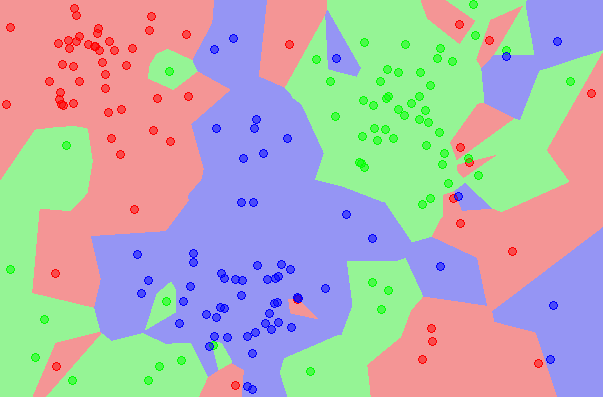

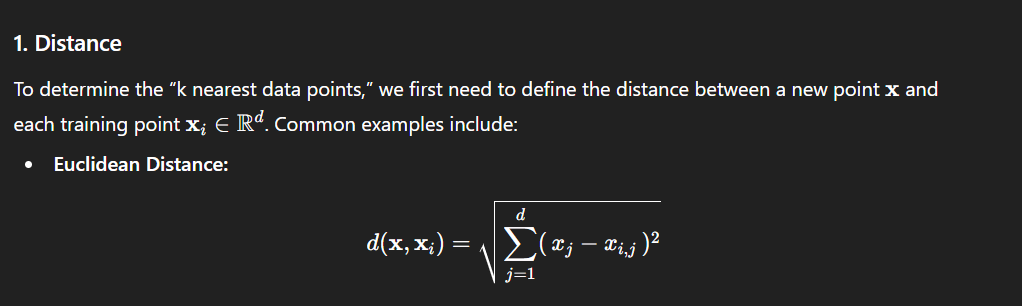

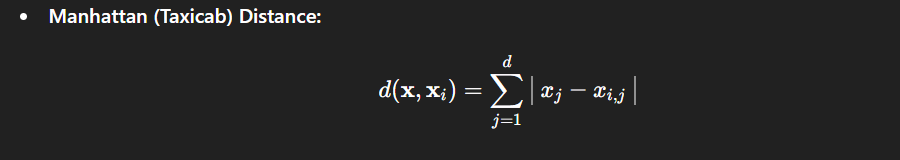

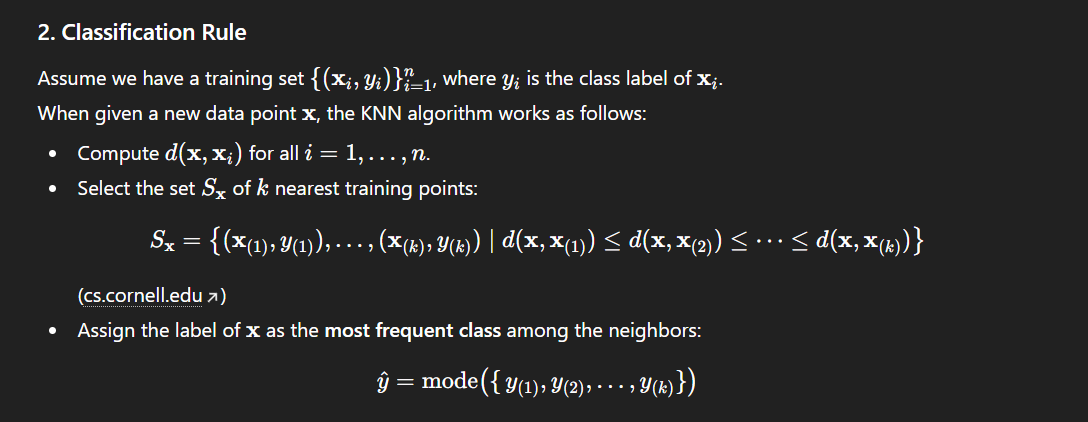

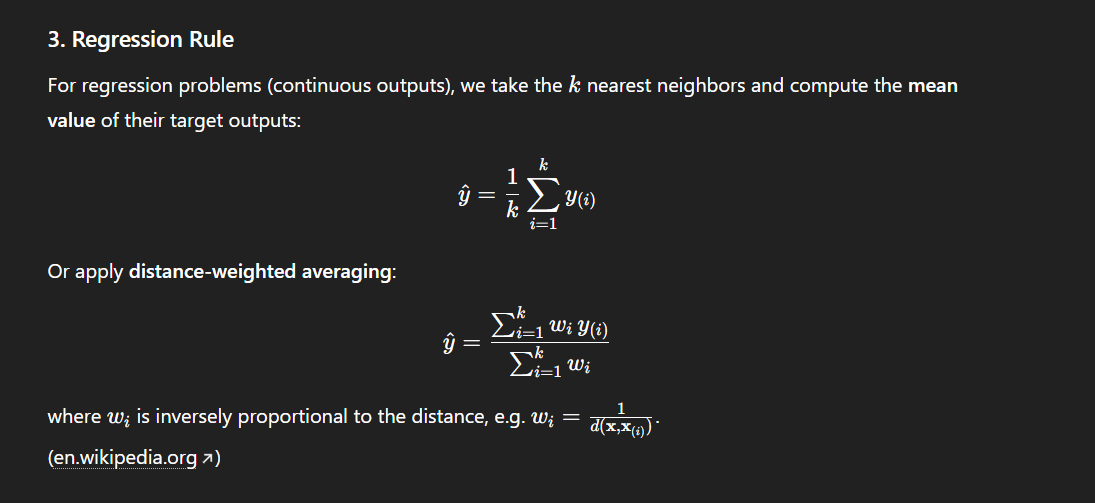

1. **Import Required Libraries**

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')


2. **Load and Inspect Dataset**

In [ ]:
# Load dataset (replace with your dataset file path)
df = pd.read_csv("Data/Wine_clean.csv")

# Remove unnamed index columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

print(" Dataset loaded successfully!")
display(df.head())

print("\n--- Dataset Info ---")
df.info()

print("\n--- Statistical Description ---")
display(df.describe())


 Dataset loaded successfully!


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5
1,-0.250994,2.167738,-1.377452,0.937243,1.365747,1.133715,0.952872,0.142508,-0.938945,0.411596,-0.579638,5
2,-0.250994,1.439628,-1.155393,0.258471,0.946004,-0.000665,0.454289,0.267217,-0.484660,0.153303,-0.579638,5
3,2.076938,-1.472812,1.731370,-0.646558,-0.243268,0.226211,0.684404,0.890766,-1.241802,-0.449381,-0.579638,6
4,-0.524869,1.075573,-1.377452,-0.646558,-0.173311,-0.454417,-0.312763,0.766056,1.408196,-0.621576,-0.989805,5



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194 entries, 0 to 1193
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1194 non-null   float64
 1   volatile acidity      1194 non-null   float64
 2   citric acid           1194 non-null   float64
 3   residual sugar        1194 non-null   float64
 4   chlorides             1194 non-null   float64
 5   free sulfur dioxide   1194 non-null   float64
 6   total sulfur dioxide  1194 non-null   float64
 7   density               1194 non-null   float64
 8   pH                    1194 non-null   float64
 9   sulphates             1194 non-null   float64
 10  alcohol               1194 non-null   float64
 11  quality               1194 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 112.1 KB

--- Statistical Description ---


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1.194000e+03,1194.000000
mean,4.284680e-16,-9.521511e-17,7.141133e-17,-2.856453e-16,-1.904302e-16,-5.950944e-17,1.071170e-16,7.236348e-15,3.511057e-16,-6.188982e-16,1.737676e-15,5.640704
std,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,1.000419e+00,0.766471
min,-2.099646e+00,-2.443625e+00,-1.377452e+00,-2.230359e+00,-2.621812e+00,-1.588798e+00,-1.386636e+00,-2.632285e+00,-2.907515e+00,-2.601823e+00,-1.707596e+00,3.000000
25%,-7.302743e-01,-8.053775e-01,-9.333346e-01,-6.465576e-01,-6.630112e-01,-7.947313e-01,-7.729942e-01,-6.665470e-01,-7.118025e-01,-7.076739e-01,-8.872630e-01,5.000000
50%,-2.509942e-01,-1.659184e-02,-4.509986e-02,-1.940431e-01,-3.339664e-02,-2.275411e-01,-2.360579e-01,1.779778e-02,7.482646e-03,-1.910878e-01,-2.720131e-01,6.000000
75%,5.706289e-01,6.508422e-01,7.876203e-01,7.109860e-01,5.962179e-01,5.665251e-01,5.214057e-01,6.382288e-01,6.321250e-01,5.837913e-01,6.508618e-01,6.000000
max,2.830092e+00,2.926185e+00,2.675119e+00,3.199816e+00,2.834848e+00,3.062162e+00,3.062265e+00,2.761413e+00,2.695338e+00,2.994526e+00,3.111862e+00,8.000000


3. **Exploratory Data Analysis (EDA)**  

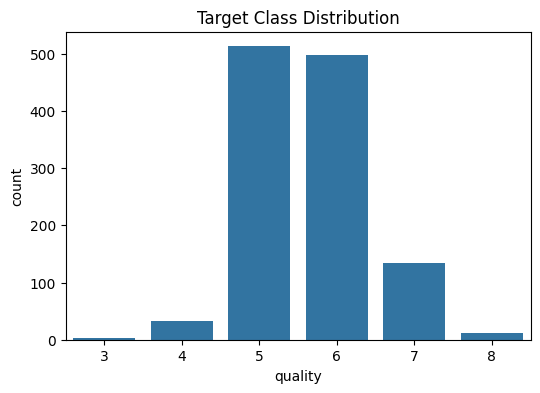

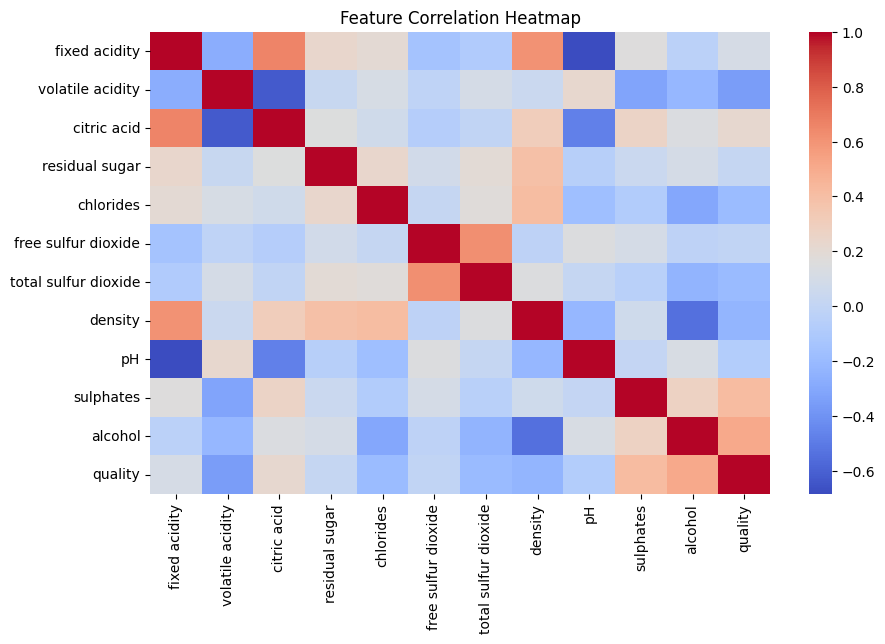

In [ ]:
# Target column assumed to be last one
target_col = df.columns[-1]

# Class balance visualization
plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=df)
plt.title("Target Class Distribution")
plt.show()

# Correlation heatmap (if dataset is numeric)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


4. **Data Preparation**  

In [ ]:
# Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


# Handle imbalance with SMOTE + undersampling

# Identify classes with fewer than 6 samples
class_counts = y.value_counts()
classes_to_remove = class_counts[class_counts < 6].index

# Remove rows belonging to these classes
df_filtered = df[~df[target_col].isin(classes_to_remove)]

X = df_filtered.iloc[:, :-1]
y = df_filtered.iloc[:, -1]


smote = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)
sampling_pipeline = Pipeline([
    ('smote', smote),
    ('under', under)
])

X_res, y_res = sampling_pipeline.fit_resample(X, y)
print(f" Data balanced successfully! Original: {X.shape} → After resampling: {X_res.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

 Data balanced successfully! Original: (1191, 11) → After resampling: (2565, 11)


5. **Model Training: KNN Classifier**

In [ ]:

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

print("Model trained successfully!")


 Model trained successfully!


6. **Model Evaluation**  


--- Model Evaluation ---
Accuracy: 0.7661

Classification Report:
              precision    recall  f1-score   support

           4       0.73      1.00      0.84       103
           5       0.68      0.49      0.57       102
           6       0.67      0.43      0.52       103
           7       0.79      0.92      0.85       103
           8       0.91      0.99      0.95       102

    accuracy                           0.77       513
   macro avg       0.75      0.77      0.75       513
weighted avg       0.75      0.77      0.75       513



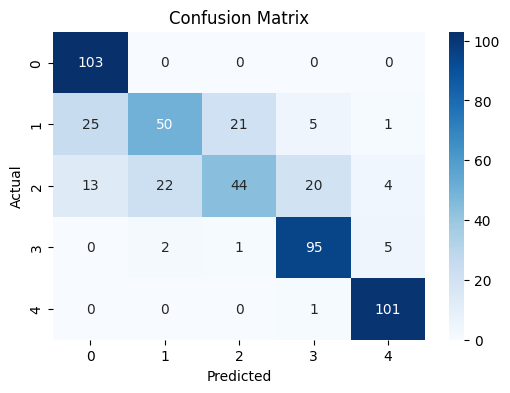

ROC-AUC: 0.9268


In [ ]:
# Accuracy and classification report
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC (if applicable)
try:
    roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test), multi_class='ovr')
    print(f"ROC-AUC: {roc_auc:.4f}")
except:
    print("ROC-AUC skipped (target not suitable for multi-class probability).")


##  Results Summary

| Metric | Value |
|:--------|:------|
| **Accuracy** | 0.7661 |
| **Weighted Precision** | 0.75 |
| **Weighted Recall** | 0.77 |
| **Weighted F1-Score** | 0.75 |
|**ROC-AUC:** | 0.9268 |

### Class-wise Performance

| Class | Precision | Recall | F1-Score | Support |
|:------|:-----------|:--------|:-----------|:---------|
| **4** | 0.73 | 1.00 | 0.84 | 103 |
| **5** | 0.68 | 0.49 | 0.57 | 102 |
| **6** | 0.67 | 0.43 | 0.52 | 103 |
| **7** | 0.79 | 0.92 | 0.85 | 103 |
| **8** | 0.91 | 0.99 | 0.95 | 102 |

---

## Conclusion

- The **K-Nearest Neighbors (KNN)** model achieved an overall **accuracy of 76.6%**, indicating strong classification performance on the standardized wine dataset.  
- Class **4** and **8** were predicted with **high precision and recall**, showing that KNN performs well for classes with distinct feature patterns.  
- However, classes **5** and **6** show **lower recall and F1-scores**, suggesting that these classes overlap more in feature space or are underrepresented even after balancing.
- The model’s **macro-average F1-score (0.75)** suggests a balanced overall performance across classes, while the **weighted-average F1-score (0.75)** indicates consistent results despite class frequency differences.

###  Insights & Next Steps

- Consider **hyperparameter tuning** (e.g., adjusting `n_neighbors`, distance metrics like “manhattan” or “cosine”) to further refine model accuracy.  
- Applying **dimensionality reduction** (PCA or LDA) could help mitigate overlapping feature regions between close-quality wine classes.  
- Comparing this KNN model with **SVM** or **Random Forest** models can provide insights into whether non-linear or ensemble methods yield higher accuracy.  
- Despite minor class imbalance, the model generalizes well — showing that the **SMOTE + undersampling strategy** effectively improved representation.

---

 **In summary:**  
The KNN classifier demonstrates **solid and balanced performance** with **~77% accuracy**, making it a reliable baseline for multi-class classification on this wine dataset.
